In [6]:
# Pythonもモジュールを読み込み
import numpy as np # 数値計算ライブラリ
from scipy.integrate import odeint # 常微分方程式を解くライブラリ
import matplotlib.pyplot as plt # 描画ライブラリ

In [7]:
# 二体問題の運動方程式
def func_twobody(x, t):
	GM = 1.327e11 # 万有引力定数×中心天体の質量, km^3/s^(-2)
	r_norm = np.sqrt(x[0]**2 + x[1]**2)	
	dxdt = [x[2], 
			x[3], 
			-GM*x[0]/(r_norm**3),
			-GM*x[1]/(r_norm**3)]
	return dxdt

In [8]:
# 条件の設定
r_earth = 149597870.7 # 地球の公転軌道半径, km
v_earth = np.sqrt(1.327e11/r_earth) # 地球の公転速度, km/s
vinf = 5 # 地球公転速度に対する相対速度V∞, km/s
v_sc_x = np.sqrt(4*v_earth**2-vinf**2)*vinf/(2*v_earth) # 探査機の公転速度のx成分, km/s
v_sc_y = (2*v_earth**2 - vinf**2)/(2*v_earth) # 探査機の公転速度のy成分, km/s
x0 = np.array([r_earth, 0.0, -v_sc_x, v_sc_y]) # 位置, 速度, km, km/s
t = np.linspace(0,365*24*60*60,100) # 1年分を100ステップで刻む

In [9]:
# 微分方程式の数値計算
sol = odeint(func_twobody, x0, t)

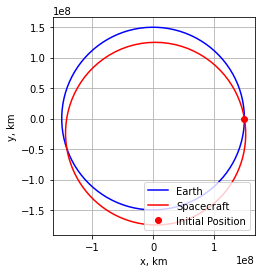

In [10]:
# 軌道の描画
theta = np.linspace(0,2*np.pi,100)
plt.plot(r_earth*np.cos(theta),r_earth*np.sin(theta),'b', label="Earth") # 地球の軌道
plt.plot(sol[:, 0],sol[:, 1], 'r', label="Spacecraft")
plt.plot(sol[0, 0],sol[0, 1], 'ro', label="Initial Position")
plt.grid() # 格子をつける
plt.legend(loc="lower right")
plt.gca().set_aspect('equal') # グラフのアスペクト比を揃える
plt.xlabel('x, km')
plt.ylabel('y, km')
plt.show()

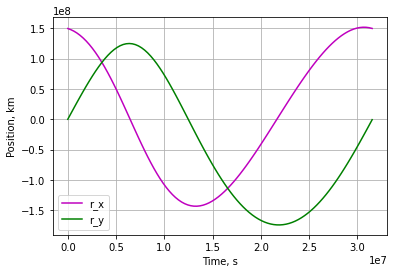

In [11]:
# 位置の時間変化の描画
plt.plot(t, sol[:, 0],'m',label="r_x") # 位置ベクトルのx成分の時間変化
plt.plot(t, sol[:, 1],'g',label="r_y") # 位置ベクトルのy成分の時間変化
plt.grid() # 格子をつける
plt.xlabel("Time, s")
plt.ylabel("Position, km")
plt.legend()
plt.show()